``` bash
python launch_sst2_pdb.py -pdb 5awl.pdb -dir tmp_CLN025_sst2_10_rung_5awl -n CLN025 -pad 1.5 -eq_time_expl 10 -time 1000 -temp_num 10 -min_temp 280 -temp_time 10
```

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import MDAnalysis as mda
import nglview as nv 
from scipy.ndimage import gaussian_filter1d
from cmcrameri import cm

import sys
sys.path.append('/home/murail/Documents/Code/SST2/src')
import SST2.analysis.data_plot as data_plot
import SST2.analysis.trajectory as trajectory

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3.5)
plt.rcParams['figure.dpi'] = 100

custom = {"grid.linestyle": "dotted", "grid.color":"black", "axes.grid": True}
sns.set_theme(context="paper", style="ticks", rc=custom)
colorscale = cm.roma

- prepare ref pdb:

```
vmd 2O02.pdb
[atomselect top "not chain A P"] set chain O
[atomselect top "chain P"] set chain B
[atomselect top "not chain O and not altloc B C D"] writepdb 2O02_clean.pdb
quit

```

In [3]:
name = 'CLN025'

OUT_PATH = f'CLN025_sst2_10_rung_5awl_2ps/'
colorscale = cm.roma
ref_coor = [f'5awl.pdb']

ref_name = ref_coor[0][:4]

name_fig = f'{name}_F_1'
OUT_FIG = 'fig'

start_pdb = f'{OUT_PATH}/{name}_em_water.pdb'
first_pdb = f'{OUT_PATH}/{name}_em_water.pdb'

max_graph_point = 50000
dt = 0.004

ref_Sel = "protein and chainID A"
pep_Sel = "protein and chainID A"

show_weights = True
use_only_300 = False

if not os.path.exists(OUT_FIG):
    os.makedirs(OUT_FIG)

time_ax_name = r"$Time\;(\mu s)$"

In [7]:
f'{OUT_PATH}/{name}_sst2'

'CLN025_sst2_10_rung_5awl_2ps//CLN025_sst2'

In [14]:
df_all = data_plot.read_ST_data(
    f'{OUT_PATH}/{name}_sst2', 
    fields=["Steps", "Aim Temp (K)", "E solute scaled (kJ/mole)",
            "E solute not scaled (kJ/mole)",
            "E solvent (kJ/mole)", "E solvent-solute (kJ/mole)"],
    lambda_T_ref = 300,
    dt=dt
)

In [15]:
df_all.tail(5)

,Steps,Aim Temp (K),E solute scaled (kJ/mole),E solute not scaled (kJ/mole),E solvent (kJ/mole),E solvent-solute (kJ/mole),Step,Potential Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Speed (ns/day),$Time\;(\mu s)$,Temp (K),lambda,$\lambda$
5000008,2499998000,466.204,-120.913,406.562,-39655.9,-2613.11,2499998000,-41423.302965,-33805.761688,302.269756,1070.0,9.999992,466.204,0.643495,0.64
5000009,2499998500,501.747,-113.365,535.948,-39760.7,-2625.06,2499998500,-41322.324614,-33529.685041,309.217787,1070.0,9.999994,501.747,0.597911,0.60
5000010,2499999000,501.747,-230.419,433.139,-39868.6,-2539.08,2499999000,-41536.601995,-33961.681219,300.578542,1070.0,9.999996,501.747,0.597911,0.60
5000011,2499999500,466.204,-152.016,462.275,-39601.7,-2627.21,2499999500,-41344.771857,-33811.318343,298.933090,1070.0,9.999998,466.204,0.643495,0.64
5000012,2500000000,501.747,-168.968,430.244,-39748.6,-2713.68,2500000000,-41517.713566,-34159.567724,291.976750,1070.0,10.000000,501.747,0.597911,0.60


In [16]:
temp_list = df_all['Aim Temp (K)'].unique()
temp_num = len(temp_list)
min_temp = temp_list[0]
max_temp = temp_list[-1]
print(f' {temp_num} Temperature ladder, min={min_temp:.1f} max={max_temp:.1f}')

 10 Temperature ladder, min=280.0 max=540.0


## Exchange probability & Round trip time


Temp change freq   = 0.837
Round trip time is = 0.904 ns 


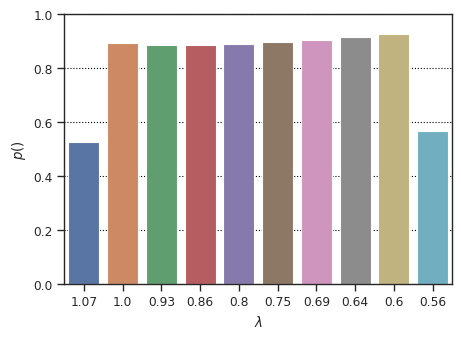

In [17]:
ex_prob, trip_time = data_plot.compute_exchange_prob(
    df_all,
    exchange_time=2,
    temp_col=r'$\lambda$')

plt.ylim(0,1)
print(f'Temp change freq   = {ex_prob:.3f}')
if trip_time is not None:
    print(f"Round trip time is = {trip_time:.3f} ns ")

In [18]:
#cp fig/CLN025_F_1_trans_proba.pdf /home/murail/ownCloud/Private/Manuscript/SST2/Figure/

## Temperature swap

<AxesSubplot: xlabel='$Time\\;(\\mu s)$', ylabel='Aim Temp (K)'>

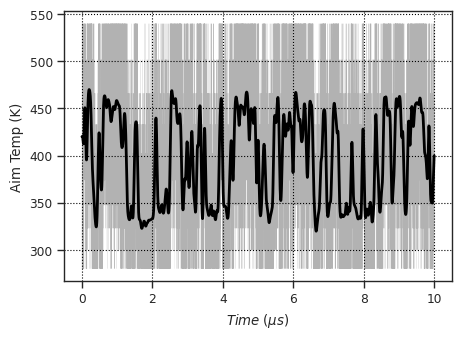

In [20]:
data_plot.plot_lineplot_avg(
    df_all,
    x=time_ax_name,
    y='Aim Temp (K)',
    max_data=max_graph_point,
    avg_win=100)

In [21]:
df_all['lambda'] = 300/df_all['Aim Temp (K)']

df_all['E solvent-solute (kJ/mole) scaled'] = 0.5*(df_all['lambda'])**0.5 * df_all['E solvent-solute (kJ/mole)'] 

df_all["new_pot"] = df_all['E solute scaled (kJ/mole)']  +\
    0.5*(df_all['lambda'])**0.5 * df_all['E solvent-solute (kJ/mole)'] 

In [23]:
if False:
    data_plot.plot_energie_swap_convergence_diff(
        df_all, lag_num = 3,
        ylabel=r'$\Delta E_{pp} + \frac{1}{2} \sqrt{\frac{\beta_0}{\beta_m}} E_{pw}\; (KJ.mol^{-1})$',
        avg_start=10)

In [24]:
if False:
    plt.rcParams['figure.figsize'] = (5, 13.5)
    data_plot.plot_energie_swap_convergence(
        df_all, lag_num = 25,
        ylabel=r'$\Delta E_{pp} + \frac{1}{2} \sqrt{\frac{\beta_0}{\beta_m}} E_{pw}\; (KJ.mol^{-1})$',
        split_graph=False, avg_start=5)

    plt.savefig(f'{OUT_FIG}/{name_fig}_e_swap.pdf', bbox_inches='tight')

    plt.rcParams['figure.figsize'] = (5, 3.5)

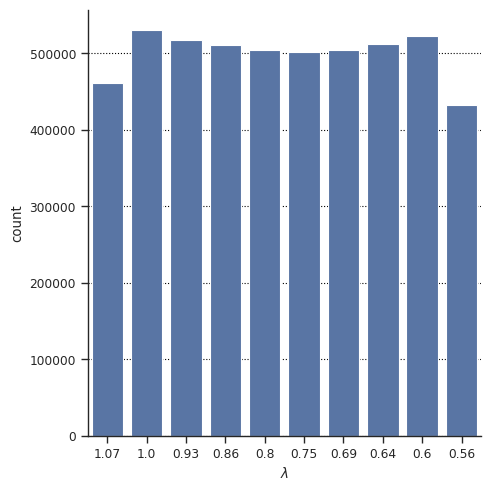

In [26]:
sns.catplot(
    df_all,
    x=r'$\lambda$',
    kind="count",                    
)
plt.savefig(f'{OUT_FIG}/{name_fig}_rung_dens.png')

In [27]:
T_ref = 300.0
df_all[r"$\lambda$"] = pd.Series(np.round(T_ref/df_all["Temp (K)"].astype(float),2), dtype="category")
# Inverse Categorie order
df_all[r"$\lambda$"] = df_all[r"$\lambda$"].cat.reorder_categories(np.sort(df_all[r"$\lambda$"].unique())[::-1], ordered=True)

In [28]:
df_all.head()

,Steps,Aim Temp (K),E solute scaled (kJ/mole),E solute not scaled (kJ/mole),E solvent (kJ/mole),E solvent-solute (kJ/mole),Step,Potential Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Speed (ns/day),$Time\;(\mu s)$,Temp (K),lambda,$\lambda$,Temp Change index,E solvent-solute (kJ/mole) scaled,new_pot
0,500,280.0,-728.240,476.817,-39897.6,-2404.52,500,-42689.920198,-35127.155473,300.096181,0.0,0.000002,280.0,1.071429,1.07,1.0,-1244.457329,-1972.697329
1,1000,300.0,-690.653,460.286,-39596.5,-2405.18,1000,-42232.046128,-34575.466093,303.818843,1080.0,0.000004,300.0,1.000000,1.00,-1.0,-1202.590000,-1893.243000
2,1500,280.0,-752.477,470.582,-39396.0,-2510.95,1500,-42330.781229,-34844.249816,297.071186,1260.0,0.000006,280.0,1.071429,1.07,1.0,-1299.540087,-2052.017087
3,2000,280.0,-735.838,490.008,-39866.3,-2391.75,2000,-42640.429182,-35303.465371,291.136231,1320.0,0.000008,280.0,1.071429,1.07,2.0,-1237.848226,-1973.686226
4,2500,280.0,-672.902,453.062,-39543.3,-2400.96,2500,-42296.472251,-34840.404617,295.862360,1220.0,0.000010,280.0,1.071429,1.07,3.0,-1242.614854,-1915.516854


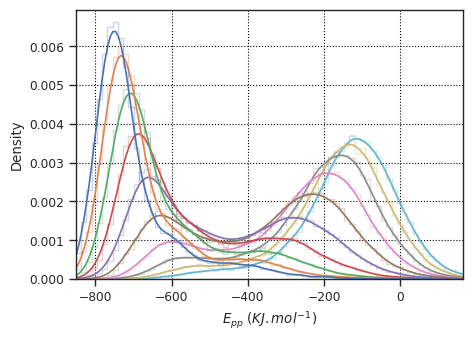

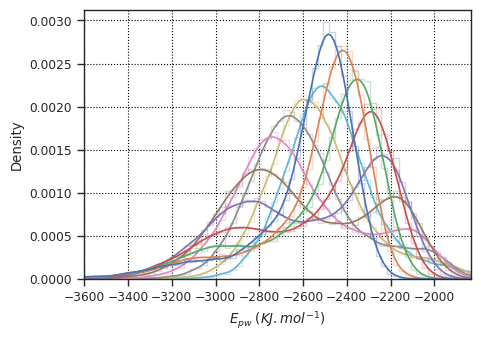

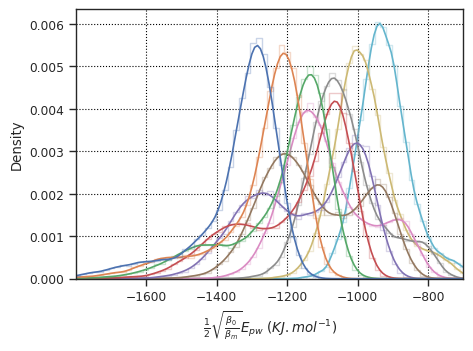

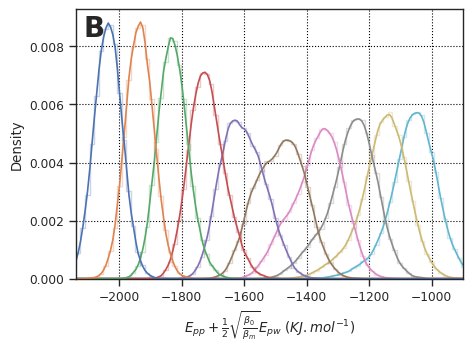

In [30]:
x_list = ["E solute scaled (kJ/mole)",
          'E solvent-solute (kJ/mole)',
          'E solvent-solute (kJ/mole) scaled',
          "new_pot"]

x_label_list = [
    r'$E_{pp}\; (KJ.mol^{-1})$',
    r'$E_{pw}\; (KJ.mol^{-1})$',
    r'$\frac{1}{2}\sqrt{\frac{\beta_0}{\beta_m}} E_{pw}\; (KJ.mol^{-1})$',
    r'$E_{pp} + \frac{1}{2} \sqrt{\frac{\beta_0}{\beta_m}} E_{pw}\; (KJ.mol^{-1})$']

label_num = 0

for x, x_label in zip(x_list, x_label_list):
    label_num += 1
    ax = data_plot.plot_distri_norm(
        df_all, 
        x=x,
        hue=r"$\lambda$",
        x_label=x_label,
        max_data=500000,
        bins=100, quant=0.001
    )
    #plt.grid()
    #plt.show()

    if label_num == 4:
        ax.text(0.02, 0.90, "B", transform=ax.transAxes, 
                size=20, weight='bold')
    
    ax.get_legend().remove()
    plt.savefig(f'{OUT_FIG}/{name_fig}_e_distri_{label_num}.pdf', dpi=300, bbox_inches='tight')

<AxesSubplot: xlabel='$E_{pp}\\;(KJ.mol^{-1})$', ylabel='$E_{pw}\\;(KJ.mol^{-1})$'>

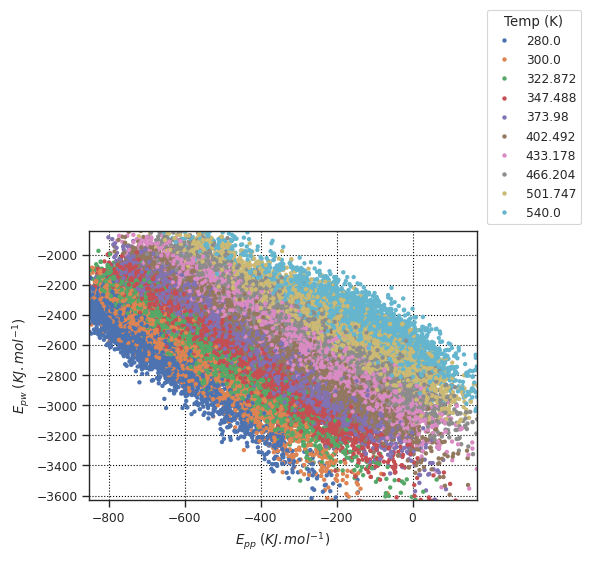

In [31]:
data_plot.plot_scatter(
    df_all,
    'E solute scaled (kJ/mole)',
    'E solvent-solute (kJ/mole)',
    "Temp (K)",
    r'$E_{pp}\;(KJ.mol^{-1})$',
    r'$E_{pw}\;(KJ.mol^{-1})$',
    quant=0.001
)

#plt.legend(title="Temp (K)", bbox_to_anchor=(1.0, 0.3))

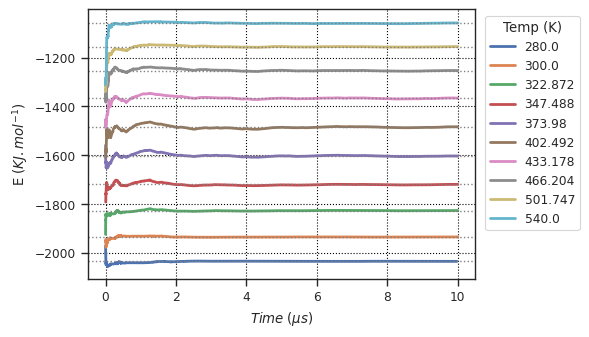

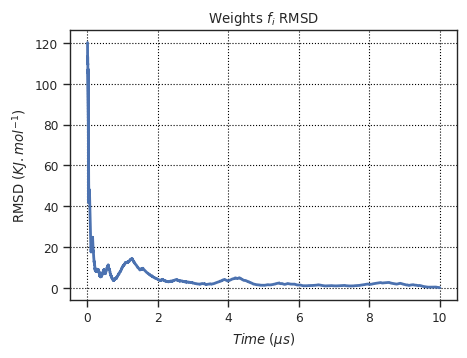

In [32]:
if show_weights:
    data_plot.plot_weight_RMSD(df_all, plot_weights=True)
    #plt.grid()

In [23]:
#df_tmp = analysis.compute_trapezoid_sst2_weights(df_all)

### Save only every 10 steps

```
mdconvert villin_10_micros_sim_temp_fly/villin_sim_temp.dcd -o villin_10_micros_sim_temp_fly/villin_sim_temp_skip100.xtc -s 20
```

In [33]:
md = trajectory.read_traj(
    start_pdb,
    f'{OUT_PATH}/{name}_sst2')

md_noh = md.select_atoms("protein and not name H*")

In [34]:
print(f'traj len : {len(md.trajectory)}')
print(f'all csv  : {len(df_all)/20}')

traj len : 250000
all csv  : 250000.65


In [35]:
df_all = df_all[::20].reset_index()

In [36]:
print(f'traj len : {len(md.trajectory)}')
print(f'all csv  : {len(df_all)}')

max_step = min([len(md.trajectory), len(df_all)])
print(f'Max step = {max_step}')

df_all = df_all[:max_step]
step_300K_index = np.where(df_all['Aim Temp (K)'] == min_temp)[0]
print(len(step_300K_index))

traj len : 250000
all csv  : 250001
Max step = 250000
23227


In [37]:
steps_num = len(step_300K_index)

md_step = 1

while steps_num > max_graph_point:
    md_step += 1
    steps_num = len(step_300K_index) // md_step

print(md_step, len(step_300K_index) // md_step)

1 23227


In [38]:
md_noh.write(f'{OUT_PATH}/noh_300K_skip.pdb',
             frames=md.trajectory[:1])
if use_only_300:
    md_noh.write(f'{OUT_PATH}/noh_300K_skip.xtc',
                 frames=md.trajectory[step_300K_index][::md_step],
                 verbose=True)
    traj_filter = f'{OUT_PATH}/noh_300K_skip.xtc'
    df_300 = df_all.loc[step_300K_index][::md_step].reset_index()
    df_300.to_csv(f'{OUT_PATH}/300K_data.csv', index=False, index_label=None)

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [39]:
if not use_only_300:
    steps_num = len(md.trajectory)

    md_step = 1

    while steps_num > max_graph_point:
        md_step += 1
        steps_num = len(md.trajectory) // md_step

    print(md_step, steps_num)

    df_300 = df_all.loc[:max_step:md_step].reset_index()
    df_300.to_csv(f'{OUT_PATH}/all_data.csv', index=False, index_label=None)

    print(len(df_300))
    
    md_noh.write(f'{OUT_PATH}/noh_skip.xtc',
             frames=md.trajectory[:max_step:md_step],
             verbose=True)
    traj_filter = f'{OUT_PATH}/noh_skip.xtc'

5 50000
50000


In [31]:
#%%time
#%%bash -s "$start_pdb" "$traj_xtc" "$md_step" "$out_pre" "$max_step"
#echo $1 $2 $3 $4 $5
#vmd -e filter_xtc.tcl -dispdev text -args $1 $2 $3 $4 $5

In [40]:
ref = mda.Universe(*ref_coor)

import openmm.app as app

pdbfile = app.PDBFile(f'{OUT_PATH}/noh_300K_skip.pdb')

md = mda.Universe(pdbfile,
                  traj_filter,
                  in_memory=True)

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:237: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [41]:
print(f'traj len : {len(md.trajectory)}')
print(f'all csv  : {len(df_300)}')


traj len : 50000
all csv  : 50000


In [42]:
trajectory.prepare_traj(md, ref_Sel)
trajectory.align_traj(md, ref, ref_Sel)
trajectory.align_traj(ref, ref, ref_Sel)

IntProgress(value=0, max=50000)

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/core/groups.py:440: DeprecationWarning: The 'pbc' kwarg has been deprecated and will be removed in version 3.0., please use 'wrap' instead
  warnings.warn("The 'pbc' kwarg has been deprecated and will be "


  0%|          | 0/50000 [00:00<?, ?it/s]

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


  0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
import MDAnalysis.analysis.rms

R = MDAnalysis.analysis.rms.RMSD(
        md,
        ref,
        select=f"backbone and ({ref_Sel})",
        groupselections=[f"backbone and ({pep_Sel})"],
        verbose=True)
R.run()

rmsd = R.results.rmsd.T
df_300['RMSD (nm)'] = rmsd[3] / 10

  0%|          | 0/50000 [00:00<?, ?it/s]

<AxesSubplot: xlabel='$Time\\;(\\mu s)$', ylabel='RMSD (nm)'>

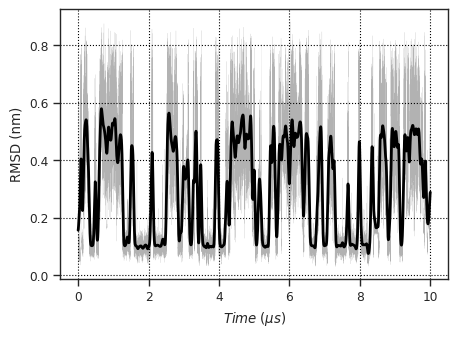

In [44]:
data_plot.plot_lineplot_avg(
    df_300,
    x=time_ax_name,
    y="RMSD (nm)",
    avg_win=100)

In [45]:
df_all.columns

Index(['index', 'Steps', 'Aim Temp (K)', 'E solute scaled (kJ/mole)',
       'E solute not scaled (kJ/mole)', 'E solvent (kJ/mole)',
       'E solvent-solute (kJ/mole)', 'Step', 'Potential Energy (kJ/mole)',
       'Total Energy (kJ/mole)', 'Temperature (K)', 'Speed (ns/day)',
       '$Time\;(\mu s)$', 'Temp (K)', 'lambda', '$\lambda$',
       'Temp Change index', 'E solvent-solute (kJ/mole) scaled', 'new_pot'],
      dtype='object')

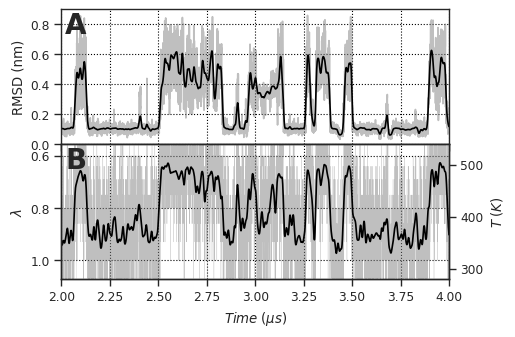

In [46]:
avg_win = 20
df_300['RMSD smooth'] = gaussian_filter1d(df_300['RMSD (nm)'], avg_win)
df_300['lambda smooth'] = gaussian_filter1d(df_300[r"$\lambda$"], avg_win)

fig, axes = plt.subplots(2, 1, figsize=(5, 3.5), sharex=True)

sns.lineplot(
    df_300,
    ax=axes[0],
    x=time_ax_name,
    y="RMSD (nm)",
    color="gray",
    alpha=0.5,
    )

sns.lineplot(
    df_300,
    ax=axes[0],
    x=time_ax_name,
    y="RMSD smooth",
    color="black",
    alpha=1,
    )

sns.lineplot(
    df_300,
    ax=axes[1],
    x=time_ax_name,
    y=r"$\lambda$",
    color="gray",
    alpha=0.5,
    lw=0.2,
    )

sns.lineplot(
    df_300,
    ax=axes[1],
    x=time_ax_name,
    y='lambda smooth',
    color="black",
    alpha=1,
    )

axes[0].set_ylim(0,0.9)

axes[0].text(0.01, 0.82, "A", transform=axes[0].transAxes, 
            size=20, weight='bold')

axes[1].set_ylim( df_300["lambda"].max(), df_300["lambda"].min())
0
axes[1].text(0.01, 0.82, "B", transform=axes[1].transAxes, 
            size=20, weight='bold')


axes2 = axes[1].twinx()
axes2.set_ylabel(r"$T\;(K)$")
axes2.set_ylim(df_300['Aim Temp (K)'].min(), df_300['Aim Temp (K)'].max())
axes2.grid(False)
#axes[1].right_ax.set_ylabel('Your second Y-Axis Label goes here!')

plt.subplots_adjust(wspace=0, hspace=0)

plt.xlim(2,4.0)

plt.savefig(f'{OUT_FIG}/{name_fig}_RMSD_lambda_subset.png', dpi=300, bbox_inches='tight')

(6.0, 8.0)

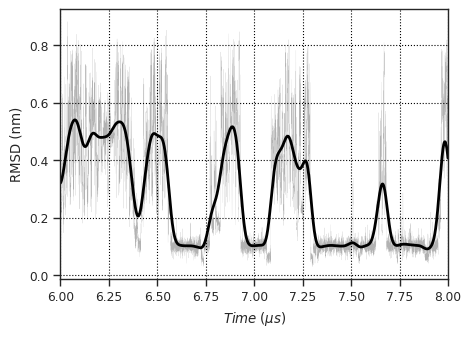

In [47]:
data_plot.plot_lineplot_avg(
    df_300,
    x=time_ax_name,
    y="RMSD (nm)",
    avg_win=100)

#analysis.plot_lineplot_avg(
#    df_all,
#    x=time_ax_name,
#    y=r'$\lambda$',
#    max_data=max_graph_point,
#    avg_win=100)
plt.xlim(6,8.0)

In [48]:
first_md = mda.Universe(first_pdb,
                        in_memory=True)

CA_pep_ref = first_md.select_atoms(f"({pep_Sel}) and name CA")
ref_com = CA_pep_ref.center_of_mass()
print("Ref Com",ref_com)

CA_pep = md.select_atoms(f"({pep_Sel}) and name CA")

com_dist = []

for ts in md.trajectory:
    #print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, md.trajectory.time))
    com = CA_pep.center_of_mass()
    com_dist.append(np.linalg.norm(ref_com - com))

df_300['COM dist (Å)'] = com_dist

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


Ref Com [18.40690012 21.44159985  8.91600008]


In [49]:
com_dist_show = False

if com_dist_show:
    df_300['COM dist (Å)'] = com_dist
    df_300['COM_dist_sig6'] = gaussian_filter1d(df_300["COM dist (Å)"], 50)

    ax = sns.scatterplot(
        data=df_300,
        x=time_ax_name,
        y='COM dist (Å)',
        linewidth=0, s=2)

    ax = sns.scatterplot(
        data=df_300,
        x=time_ax_name,
        y="COM_dist_sig6",
        linewidth=0, s=2)

## Gyration radius

In [50]:
pep = md.select_atoms(f"({pep_Sel})")

gyr = []

for ts in md.trajectory:
    #print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, md.trajectory.time))
    gyr.append(pep.radius_of_gyration())

df_300['Gyration radius (nm)'] = [i/10 for i in gyr]

Text(0, 0.5, 'Gyration radius (nm)')

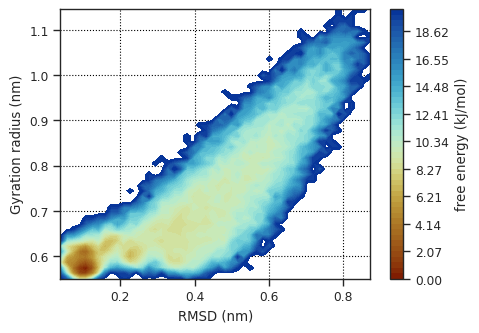

In [51]:
data_plot.plot_free_energy(
    df_300["RMSD (nm)"],df_300['Gyration radius (nm)'], 
    ncontours=50, nbins=50,
    cmap=colorscale)#,
    #avoid_zero_count=True)
plt.xlabel("RMSD (nm)")
plt.ylabel('Gyration radius (nm)')

In [52]:
df_300

,level_0,index,Steps,Aim Temp (K),E solute scaled (kJ/mole),E solute not scaled (kJ/mole),E solvent (kJ/mole),E solvent-solute (kJ/mole),Step,Potential Energy (kJ/mole),...,lambda,$\lambda$,Temp Change index,E solvent-solute (kJ/mole) scaled,new_pot,RMSD (nm),RMSD smooth,lambda smooth,COM dist (Å),Gyration radius (nm)
0,0,0,500,280.000,-728.2400,476.817,-39897.6,-2404.52,500,-42689.920198,...,1.071429,1.07,1.0,-1244.457329,-1972.697329,0.061096,0.094416,0.743064,1.009322,0.623179
1,5,100,50500,322.872,-798.0780,485.503,-39829.5,-2338.05,50500,-42339.269935,...,0.929161,0.93,-1.0,-1126.858109,-1924.936109,0.043848,0.094438,0.743112,1.096445,0.621732
2,10,200,100500,501.747,-533.8790,404.995,-39942.8,-2058.42,100500,-41448.701177,...,0.597911,0.60,-1.0,-795.833529,-1329.712529,0.067106,0.094483,0.743212,1.069984,0.609608
3,15,300,150500,501.747,-562.2710,442.749,-39961.9,-2026.83,150500,-41422.550277,...,0.597911,0.60,-1.0,-783.620093,-1345.891093,0.085887,0.094549,0.743361,1.066343,0.629220
4,20,400,200500,322.872,-757.4180,500.310,-39547.0,-2265.60,200500,-41934.356479,...,0.929161,0.93,1.0,-1091.939750,-1849.357750,0.061727,0.094637,0.743555,1.008522,0.624701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249975,4999500,2499744000,347.488,-273.2720,488.294,-39228.8,-3008.15,2499744000,-41771.498572,...,0.863339,0.86,1.0,-1397.527023,-1670.799023,0.468694,0.428925,0.739647,1.212715,0.629253
49996,249980,4999600,2499794000,501.747,-274.3720,474.677,-39538.2,-2521.94,2499794000,-41177.598066,...,0.597911,0.60,-2.0,-975.041250,-1249.413250,0.387336,0.429445,0.739967,0.989415,0.637448
49997,249985,4999700,2499844000,347.488,-326.7600,508.793,-39136.1,-2749.68,2499844000,-41464.283107,...,0.863339,0.86,1.0,-1277.446971,-1604.206971,0.460365,0.429838,0.740211,1.173732,0.598760
49998,249990,4999800,2499894000,540.000,-218.9760,365.018,-39718.4,-2409.46,2499894000,-41270.952702,...,0.555556,0.56,-2.0,-897.952725,-1116.928725,0.606771,0.430102,0.740373,1.164463,0.645862


In [58]:
import importlib
importlib.reload(data_plot)

<module 'SST2.analysis.data_plot' from '/home/murail/Documents/Code/SST2/src/SST2/analysis/data_plot.py'>

0 280.0 4675
1 300.0 5288
2 322.872 5158
3 347.488 5058
4 373.98 5039
5 402.492 5041
6 433.178 5035
7 466.204 5118
8 501.747 5301
9 540.0 4287


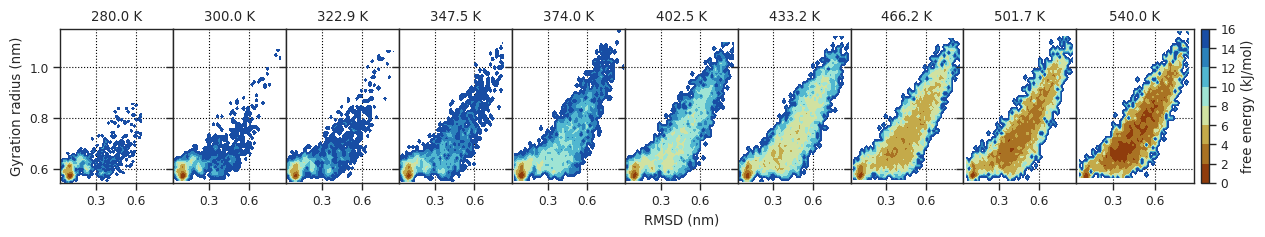

In [59]:
fig, axs = plt.subplots(1, len(temp_list), figsize=(15, 2), gridspec_kw={'width_ratios': (len(temp_list) - 1)*[1] + [1.3]})

xmin, xmax =  df_300["RMSD (nm)"].min(), df_300["RMSD (nm)"].max()
ymin, ymax =  df_300['Gyration radius (nm)'].min(), df_300['Gyration radius (nm)'].max()

for i, temp in enumerate(temp_list):
    df_temp = df_300[df_300['Aim Temp (K)'] == temp]
    print(i, temp, len(df_temp))

    if i == len(temp_list)-1:
        cbar=True
    else:
        cbar=False
    
    data_plot.plot_free_energy(
        df_temp["RMSD (nm)"],df_temp['Gyration radius (nm)'],
        ax=axs[i],
        nbins=50,
        cbar=cbar,
        vmin=0,
        vmax=16.0,
        #ncontours=100,
        levels=8,
        cmap=colorscale)#,

    if i != 0:
        axs[i].set_ylabel("")
        axs[i].set_yticklabels([])
    else:
        axs[i].set_ylabel("Gyration radius (nm)")

    if i != len(temp_list) // 2:
        axs[i].set_xlabel("")
    else:
        axs[i].set_xlabel("RMSD (nm)")
    
    axs[i].set_title(f"{temp:.1f} K")
    axs[i].set_xticks([0.3, 0.6])
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

plt.subplots_adjust(wspace=0, hspace=0)
    #plt.xlabel("RMSD (nm)")
    #plt.ylabel('Gyration radius (nm)')

## Fraction of native contact

In [60]:
df_300['Native Contact'] = trajectory.compute_native_contact(md, ref, 'protein and not name H*')

  0%|          | 0/50000 [00:00<?, ?it/s]

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/analysis/contacts.py:509: DeprecationWarning: The `timeseries` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.timeseries` instead
  warnings.warn(wmsg, DeprecationWarning)


<AxesSubplot: xlabel='$Time\\;(\\mu s)$', ylabel='Native Contact'>

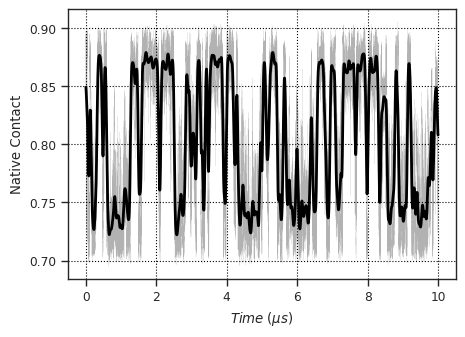

In [61]:
data_plot.plot_lineplot_avg(
    df_300,
    x=time_ax_name,
    y='Native Contact',
    avg_win=100)

Text(0, 0.5, 'Native contact')

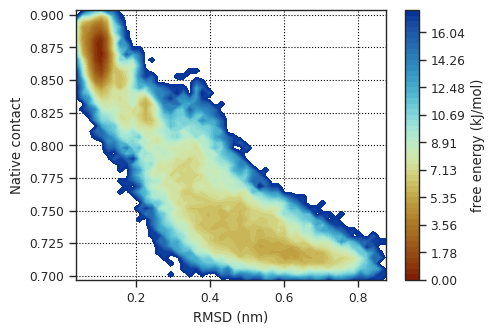

In [62]:
data_plot.plot_free_energy(
    df_300["RMSD (nm)"],
    df_300['Native Contact'], 
    ncontours=50,
    nbins=50,
    cmap=colorscale
)
plt.xlabel("RMSD (nm)")
plt.ylabel('Native contact')

In [63]:
df_300

,level_0,index,Steps,Aim Temp (K),E solute scaled (kJ/mole),E solute not scaled (kJ/mole),E solvent (kJ/mole),E solvent-solute (kJ/mole),Step,Potential Energy (kJ/mole),...,$\lambda$,Temp Change index,E solvent-solute (kJ/mole) scaled,new_pot,RMSD (nm),RMSD smooth,lambda smooth,COM dist (Å),Gyration radius (nm),Native Contact
0,0,0,500,280.000,-728.2400,476.817,-39897.6,-2404.52,500,-42689.920198,...,1.07,1.0,-1244.457329,-1972.697329,0.061096,0.094416,0.743064,1.009322,0.623179,0.886083
1,5,100,50500,322.872,-798.0780,485.503,-39829.5,-2338.05,50500,-42339.269935,...,0.93,-1.0,-1126.858109,-1924.936109,0.043848,0.094438,0.743112,1.096445,0.621732,0.891974
2,10,200,100500,501.747,-533.8790,404.995,-39942.8,-2058.42,100500,-41448.701177,...,0.60,-1.0,-795.833529,-1329.712529,0.067106,0.094483,0.743212,1.069984,0.609608,0.894044
3,15,300,150500,501.747,-562.2710,442.749,-39961.9,-2026.83,150500,-41422.550277,...,0.60,-1.0,-783.620093,-1345.891093,0.085887,0.094549,0.743361,1.066343,0.629220,0.883135
4,20,400,200500,322.872,-757.4180,500.310,-39547.0,-2265.60,200500,-41934.356479,...,0.93,1.0,-1091.939750,-1849.357750,0.061727,0.094637,0.743555,1.008522,0.624701,0.893846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249975,4999500,2499744000,347.488,-273.2720,488.294,-39228.8,-3008.15,2499744000,-41771.498572,...,0.86,1.0,-1397.527023,-1670.799023,0.468694,0.428925,0.739647,1.212715,0.629253,0.768073
49996,249980,4999600,2499794000,501.747,-274.3720,474.677,-39538.2,-2521.94,2499794000,-41177.598066,...,0.60,-2.0,-975.041250,-1249.413250,0.387336,0.429445,0.739967,0.989415,0.637448,0.741560
49997,249985,4999700,2499844000,347.488,-326.7600,508.793,-39136.1,-2749.68,2499844000,-41464.283107,...,0.86,1.0,-1277.446971,-1604.206971,0.460365,0.429838,0.740211,1.173732,0.598760,0.773451
49998,249990,4999800,2499894000,540.000,-218.9760,365.018,-39718.4,-2409.46,2499894000,-41270.952702,...,0.56,-2.0,-897.952725,-1116.928725,0.606771,0.430102,0.740373,1.164463,0.645862,0.738772


<AxesSubplot: xlabel='$Time\\;(\\mu s)$', ylabel='Potential Energy (kJ/mole)'>

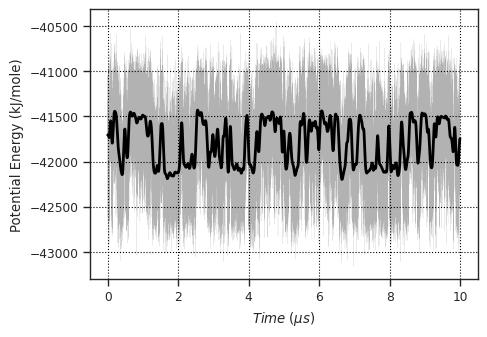

In [64]:
data_plot.plot_lineplot_avg(
    df_300,
    x=time_ax_name,
    y="Potential Energy (kJ/mole)",
    avg_win=100)

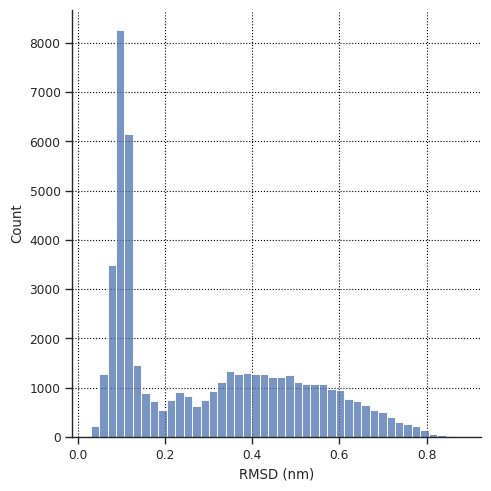

In [65]:
ax = sns.displot(df_300["RMSD (nm)"])

## Compute PCA

  0%|          | 0/50000 [00:00<?, ?it/s]

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/analysis/pca.py:337: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


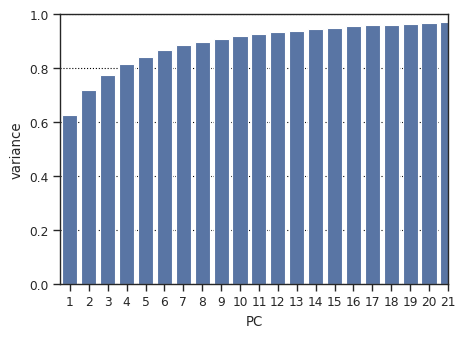

In [66]:
prot_pca, pca_df, pca_ref_df = trajectory.compute_pca(md, ref, sel='backbone', cum_var=0.8)
df_300['PC_1'] = pca_df['PC_1']
df_300['PC_2'] = pca_df['PC_2']

## Plot density for PC 1-2

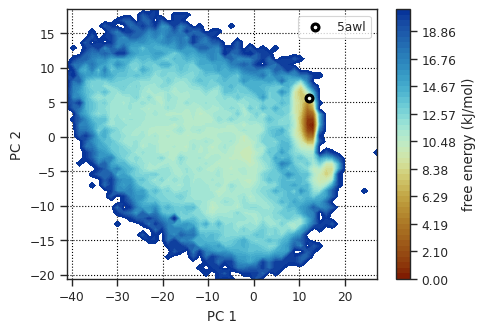

In [67]:
data_plot.plot_free_energy(
    pca_df.PC_1,
    pca_df.PC_2,
    nbins=50,
    ncontours=50,
    cmap=colorscale)#,
    #avoid_zero_count=True)

plt.scatter(pca_ref_df.PC_1, pca_ref_df.PC_2,
            color='white', s=5, linewidth=5,
            edgecolor = 'black',
            label=ref_name)
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.savefig(f'{OUT_FIG}/{name_fig}_PC_1_2_free_ener.png', dpi=300)

## Clustering with HDBSCAN

In [68]:
df_300['clust'] = data_plot.compute_cluster_hdbscan(pca_df)

<AxesSubplot: xlabel='$Time\\; (\\mu s)$', ylabel='cluster'>

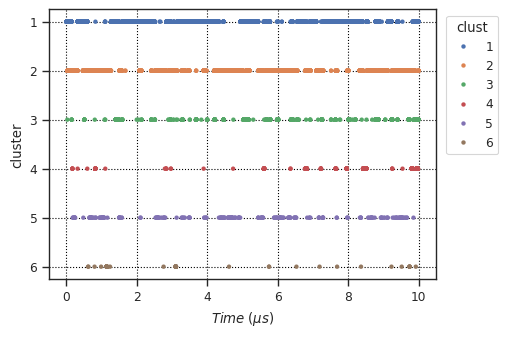

In [69]:
data_plot.plot_scatter(
    df_300,
    time_ax_name,
    "clust",
    "clust",
    x_label=r'$Time\; (\mu s)$',
    y_label=r'cluster')

<AxesSubplot: xlabel='$Time\\; (\\mu s)$', ylabel='$RMSD\\; (nm)$'>

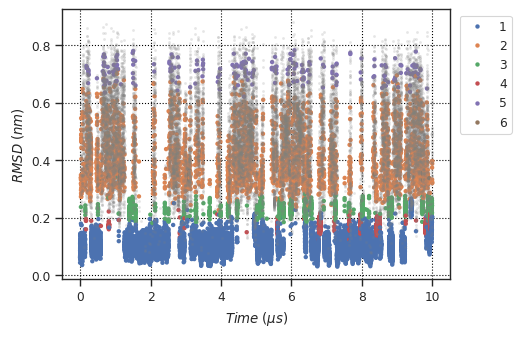

In [70]:
data_plot.plot_scatter(
    df_300,
    time_ax_name,
    "RMSD (nm)",
    "clust",
    x_label=r'$Time\; (\mu s)$',
    y_label=r'$RMSD\; (nm)$')

data_plot.plot_scatter(
    df_300[df_300.clust.isnull()],
    time_ax_name,
    "RMSD (nm)",
    x_label=r'$Time\; (\mu s)$',
    y_label=r'$RMSD\; (nm)$',
    color='gray', s=4, alpha=0.2,
    legend=False)

<AxesSubplot: xlabel='PC 1', ylabel='PC 2'>

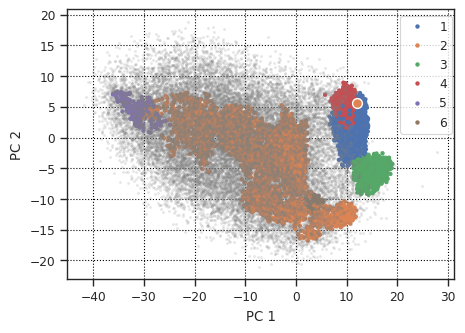

In [71]:
data_plot.plot_scatter(
    df_300,
    x="PC_1", y="PC_2", hue="clust",
    x_label="PC 1",
    y_label="PC 2")
data_plot.plot_scatter(
    df_300[df_300.clust.isnull()],
    x="PC_1", y="PC_2",
    x_label="PC 1",
    y_label="PC 2",
    color='gray', s=4, alpha=0.2,
    legend=False)
data_plot.plot_scatter(
    pca_ref_df,
    x="PC_1", y="PC_2",
    x_label="PC 1", label=ref_name,
    y_label="PC 2", s=50, linewidth=1)

<AxesSubplot: xlabel='PC_1', ylabel='PC_2'>

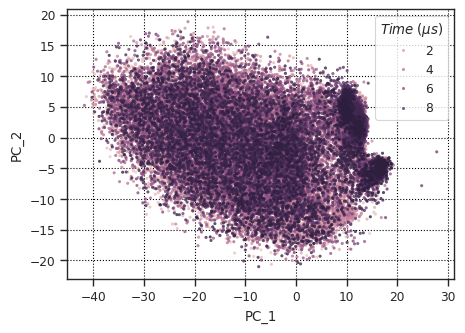

In [72]:
sns.scatterplot(data=df_300,
                x="PC_1", y="PC_2",
                hue=time_ax_name,
                s=5,
                alpha=0.8,
                linewidth=0)

In [73]:
center_frame = []

dt = md.trajectory.dt

md_noh = md.select_atoms(f"protein and not name H* and ({pep_Sel})")
md_noh.write("tmp_ref.pdb")

ref_tmp = mda.Universe('tmp_ref.pdb')
ref_sel = ref_tmp.select_atoms(f"protein and not name H* and ({pep_Sel})")

n_clusters_ = len(df_300['clust'].unique())

for clust in range(1, n_clusters_):
    indexes = [i for i, val in enumerate(df_300['clust']) if val==clust]
    print(f'Cluster : {clust:3}, num: {len(indexes):6}')
    
    # Compute avg structures:
    p_avg = np.zeros_like(md_noh.atoms.positions)

    # do a quick average of the protein (in reality you probably want to remove PBC and RMSD-superpose)
    for ts in md.trajectory[indexes]:
        p_avg += md_noh.atoms.positions
    p_avg /= len(indexes)
    ref_sel.atoms.positions = p_avg
    
    min_rmsd = np.inf
    step = 0
    frame = 0
    for ts in md.trajectory[indexes]:
        R = mda.analysis.rms.rmsd(md_noh.atoms.positions, ref_sel.atoms.positions)
        if R<min_rmsd:
            min_rmsd = R
            frame = ts.frame
            time= ts.time
    
    local_df = df_300[df_300.clust == clust]
    
    print(f'\t closest structure : {frame:6},   size= {len(indexes):6}   RMSD={local_df["RMSD (nm)"].mean():.2f}')
    center_frame.append([clust, frame, len(indexes)])

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  warnings.warn("Found no information for attr: '{}'"
/home/murail/miniconda3/envs/openmm2/lib/

Cluster :   1, num:  21583
	 closest structure :  28094,   size=  21583   RMSD=0.10
Cluster :   2, num:   4187
	 closest structure :  35540,   size=   4187   RMSD=0.40
Cluster :   3, num:   1405
	 closest structure :  31879,   size=   1405   RMSD=0.23
Cluster :   4, num:   1053
	 closest structure :  42102,   size=   1053   RMSD=0.17
Cluster :   5, num:    232
	 closest structure :  45149,   size=    232   RMSD=0.71
Cluster :   6, num:     68
	 closest structure :  15535,   size=     68   RMSD=0.34


In [74]:
df_300[(df_300.clust==1) & (df_300["RMSD (nm)"]<0.2)].tail(100)

,level_0,index,Steps,Aim Temp (K),E solute scaled (kJ/mole),E solute not scaled (kJ/mole),E solvent (kJ/mole),E solvent-solute (kJ/mole),Step,Potential Energy (kJ/mole),...,new_pot,RMSD (nm),RMSD smooth,lambda smooth,COM dist (Å),Gyration radius (nm),Native Contact,PC_1,PC_2,clust
49595,247975,4959500,2479744000,373.980,-653.563,397.497,-39806.1,-2136.16,2479744000,-41846.105925,...,-1610.184686,0.108547,0.127639,0.849230,1.081638,0.568071,0.870678,13.083241,0.837595,1
49596,247980,4959600,2479794000,347.488,-693.381,509.663,-39598.2,-2348.89,2479794000,-41869.641451,...,-1784.628860,0.080653,0.125921,0.851024,0.993752,0.572111,0.866890,12.360335,3.346821,1
49597,247985,4959700,2479844000,322.872,-747.652,555.164,-39838.7,-2310.19,2479844000,-42205.070526,...,-1861.082566,0.152042,0.124294,0.852774,1.072296,0.568810,0.876833,11.548269,-1.604966,1
49598,247990,4959800,2479894000,322.872,-671.289,426.071,-39961.0,-2404.13,2479894000,-42476.105024,...,-1829.995352,0.104431,0.122759,0.854468,0.981332,0.573286,0.869674,12.366682,1.026209,1
49599,247995,4959900,2479944000,300.000,-745.633,488.257,-39424.0,-2413.36,2479944000,-42094.718119,...,-1952.313000,0.098311,0.121317,0.856097,1.079490,0.580666,0.878997,12.968936,1.682168,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49923,249615,4992300,2496144000,322.872,-488.939,430.749,-39253.6,-2783.06,2496144000,-41959.787597,...,-1830.276323,0.158994,0.225535,0.764986,1.283884,0.627351,0.816155,9.053651,3.005289,1
49924,249620,4992400,2496194000,300.000,-596.502,408.455,-39757.5,-2518.50,2496194000,-42464.055442,...,-1855.752000,0.152062,0.228358,0.764843,1.314727,0.598560,0.814765,10.941568,1.640437,1
49925,249625,4992500,2496244000,373.980,-494.238,450.026,-39824.2,-2625.53,2496244000,-42122.243510,...,-1670.010851,0.165250,0.231319,0.764628,1.216146,0.586579,0.818273,8.700533,4.016823,1
49939,249695,4993900,2496944000,347.488,-592.998,520.984,-39738.9,-2494.44,2496944000,-42047.612858,...,-1751.865512,0.158331,0.283826,0.753337,1.161467,0.606690,0.817706,12.868647,-1.009695,1


In [75]:
view = nv.show_mdanalysis(md)
view.add_component(ref_coor[0])
view.clear_representations(1)
view[1].add_cartoon(selection="protein", color='blue')
view[1].add_licorice(selection=":A", color='blue')
view[0].add_licorice(selection=":A")

from ipywidgets import interact

def update(n):
    
    local_df = df_300[df_300.clust == n]
    
    view.frame = center_frame[n-1][1]
    print(f"Cluster {n}, size={center_frame[n-1][2]}, frame={center_frame[n-1][1]}, RMSD={local_df['RMSD (nm)'].mean():.2f}")

interact(update, n=range(1, len(center_frame)+1));

view

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6), value=1), Output()), _dom_classes=…

NGLWidget(frame=28094, max_frame=49999)

In [76]:
from MDAnalysis.analysis import diffusionmap

matrix = diffusionmap.DistanceMatrix(md, select=f'backbone and ({pep_Sel})',
                                     verbose=True, pairwise_align=False).run(step=20)

  0%|          | 0/2500 [00:00<?, ?it/s]

/home/murail/miniconda3/envs/openmm2/lib/python3.10/site-packages/MDAnalysis/analysis/diffusionmap.py:288: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


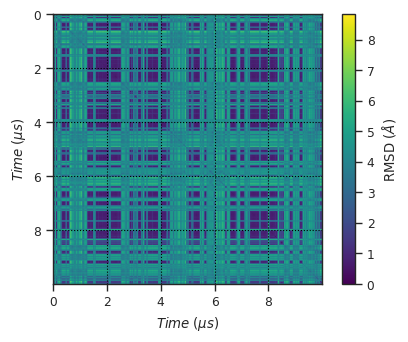

In [77]:
# WARNING: time is not continuous as only 300K frames are shown

max_RMSD = df_300["RMSD (nm)"].max() * 10 # Angstrom

last_time = df_300.iloc[-1][time_ax_name]

plt.imshow(matrix.dist_matrix,
           cmap='viridis',
           vmax=max_RMSD,
           extent=[0, last_time, last_time, 0])
plt.xlabel(time_ax_name)
plt.ylabel(time_ax_name)
plt.colorbar(label=r'RMSD ($\AA$)')

In [78]:
print(f"vmd {OUT_PATH}/noh_300K_skip.pdb {traj_filter}"\
      f" -m ../REST2_test/{ref_coor[0]} -e ../REST2_test/visualize_pep.tcl")

vmd CLN025_sst2_10_rung_5awl_2ps//noh_300K_skip.pdb CLN025_sst2_10_rung_5awl_2ps//noh_skip.xtc -m ../REST2_test/5awl.pdb -e ../REST2_test/visualize_pep.tcl


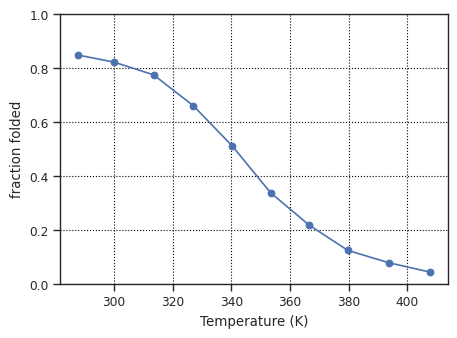

In [79]:
if not use_only_300:
    data_plot.plot_folding_fraction(df_300)#[df_300[time_ax_name]>0.15])

<AxesSubplot: xlabel='$Time\\;(\\mu s)$', ylabel='RMSD (nm)'>

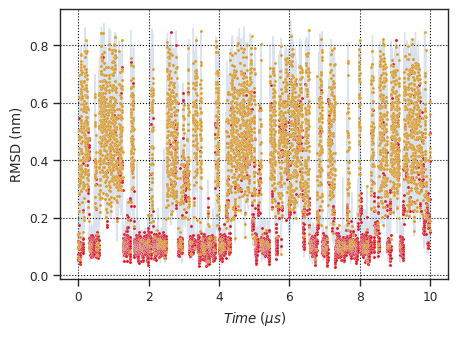

In [80]:
sns.lineplot(data=df_300,
             x=time_ax_name,
             y="RMSD (nm)", alpha=0.2, linewidth=1)
sns.scatterplot(data=df_300[df_300["Aim Temp (K)"] == temp_list[1]],
             x=time_ax_name, color='red', s=5,
             y="RMSD (nm)")
sns.scatterplot(data=df_300[df_300["Aim Temp (K)"] == temp_list[-1]],
             x=time_ax_name, color='orange', s=5,
             y="RMSD (nm)")

In [81]:
msd = False

if msd:

    from MDAnalysis.analysis.waterdynamics import MeanSquareDisplacement as MSD
    from scipy import stats

    tot_time = md.trajectory.dt * md.trajectory.n_frames
    print(f"Total simulation time should be {tot_time/1000:.2f} ns")

    lag_time = 20 #ns
    end_time = int(lag_time * 1000/md.trajectory.dt)

    MSD = MSD(md, pep_Sel, 0, md.trajectory.n_frames, end_time)
    MSD.run()

    dt = md.trajectory.dt
    time = np.arange(0.0, dt*len(MSD.timeseries), dt)

    start_time = 5 #ns
    start_frame = int(start_time * 1000/md.trajectory.dt)
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        time[start_frame:],MSD.timeseries[start_frame:])
    estimate = time*slope + intercept

    print("D (10-6 m**2/s) =", 1000*slope/0.6)

In [82]:
if msd:
    # Plot
    # sns.set_theme(style="ticks")

    plt.xlabel('time (ns)')
    plt.ylabel('MSD ($\\AA^2$)')
    plt.semilogy(time/1000, MSD.timeseries,
                 'ro', label=f"D = {1000*slope/0.6:.2f}"+"  $10^{-6}.m^2.s^{-1}$")
    plt.semilogy(time/1000, estimate, color="black", linestyle=":")
    plt.legend()
    plt.legend(bbox_to_anchor=(0.24, 0.55))
    plt.show()